In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [11]:
# Import necessary libraries
import pandas as pd

# Load the data from the Excel file
loan_data = pd.read_excel('CREDO Loan Data.xlsx')

# Display the first few rows of the dataset to understand its structure
loan_data.head()

# Check for any missing values in the dataset
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            247 non-null    int64  
 1   Gender             247 non-null    int64  
 2   Married            247 non-null    int64  
 3   Dependents         247 non-null    int64  
 4   Graduate           247 non-null    int64  
 5   Self_Employed      247 non-null    int64  
 6   ApplicantIncome    247 non-null    int64  
 7   CoapplicantIncome  247 non-null    float64
 8   LoanAmount         247 non-null    int64  
 9   Loan_Amount_Term   247 non-null    int64  
 10  Credit_History     247 non-null    int64  
 11  Property_Area      247 non-null    int64  
 12  Loan_Status        247 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 25.2+ KB


In [13]:
# Ensure LoanID is set as the index
loan_data.set_index('Loan_ID', inplace=True)

# Fill missing values or drop rows/columns with missing data
loan_data.dropna(inplace=True)

# Convert categorical columns based on the provided mapping
loan_data['Gender'] = loan_data['Gender'].map({1: 'Male', 2: 'Female'})
loan_data['Married'] = loan_data['Married'].map({0: 'Single', 1: 'Married'})
loan_data['Graduate'] = loan_data['Graduate'].map({0: 'No', 1: 'Yes'})
loan_data['Self_Employed'] = loan_data['Self_Employed'].map({0: 'No', 1: 'Yes'})
loan_data['Credit_History'] = loan_data['Credit_History'].map({0: 'No', 1: 'Yes'})
loan_data['Property_Area'] = loan_data['Property_Area'].map({1: 'Urban', 2: 'Semiurban', 3: 'Rural'})

# Display the cleaned data
loan_data.head()


,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
2284,Male,Single,0,No,No,3902,1666.0,109,333,Yes,Rural,Y
2287,Female,Single,0,Yes,No,1500,1800.0,103,333,No,Semiurban,N
2288,Male,Married,2,No,No,2889,0.0,45,180,No,Urban,N
2296,Male,Single,0,No,No,2755,0.0,65,300,Yes,Rural,N
2297,Male,Single,0,Yes,No,2500,20000.0,103,333,Yes,Semiurban,Y


In [14]:
# Calculate the total amount loaned by CFS
total_amount_loaned = loan_data['LoanAmount'].sum()

# Calculate the average loan amount
average_loan_amount = loan_data['LoanAmount'].mean()

# Calculate the average loan term
average_loan_term = loan_data['Loan_Amount_Term'].mean()

# Count the number of applicants broken down into Approved and Rejected
approval_counts = loan_data['Loan_Status'].value_counts()

# Breakdown of applicants by gender within Approved and Rejected categories
gender_approval_counts = loan_data.groupby(['Loan_Status', 'Gender']).size()

# Calculate the maximum and minimum loan amounts
max_loan_amount = loan_data['LoanAmount'].max()
min_loan_amount = loan_data['LoanAmount'].min()

# Calculate the percentage of self-employed applicants who had their loan approved
self_employed_approved = loan_data[(loan_data['Self_Employed'] == 'Yes') & (loan_data['Loan_Status'] == 'Y')].shape[0]
total_approved = loan_data[loan_data['Loan_Status'] == 'Y'].shape[0]
percentage_self_employed_approved = (self_employed_approved / total_approved) * 100

# Display the results
print(f"Total amount loaned: {total_amount_loaned}")
print(f"Average loan amount: {average_loan_amount}")
print(f"Average loan term: {average_loan_term}")
print(f"Approval counts:\n{approval_counts}")
print(f"Gender breakdown of approvals:\n{gender_approval_counts}")
print(f"Maximum loan amount: {max_loan_amount}")
print(f"Minimum loan amount: {min_loan_amount}")
print(f"Percentage of self-employed approved: {percentage_self_employed_approved:.2f}%")


Total amount loaned: 37699
Average loan amount: 152.62753036437246
Average loan term: 320.0404858299595
Approval counts:
Loan_Status
Y    167
N     80
Name: count, dtype: int64
Gender breakdown of approvals:
Loan_Status  Gender
N            Female     16
             Male       64
Y            Female     33
             Male      134
dtype: int64
Maximum loan amount: 600
Minimum loan amount: 9
Percentage of self-employed approved: 13.77%


Approval Status Counts:
Loan_Status
Y    167
N     80
Name: count, dtype: int64


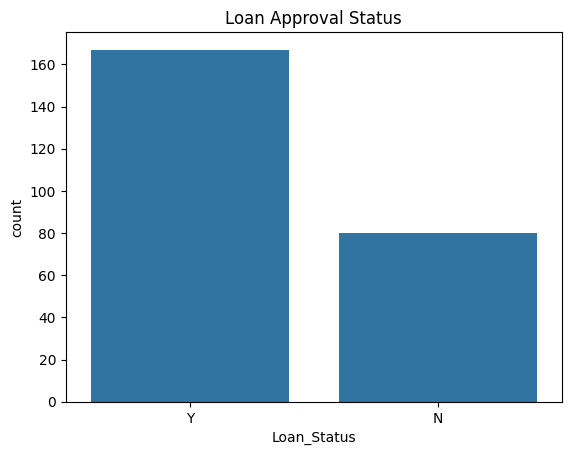

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Breakdown of applicants by approval status (Table and Plot)
approval_counts = loan_data['Loan_Status'].value_counts()
print("Approval Status Counts:")
print(approval_counts)

# Plot the breakdown of applicants by approval status
sns.countplot(x='Loan_Status', data=loan_data)
plt.title('Loan Approval Status')
plt.show()


Gender Breakdown within Approval Status:
Gender       Female  Male
Loan_Status              
N                16    64
Y                33   134


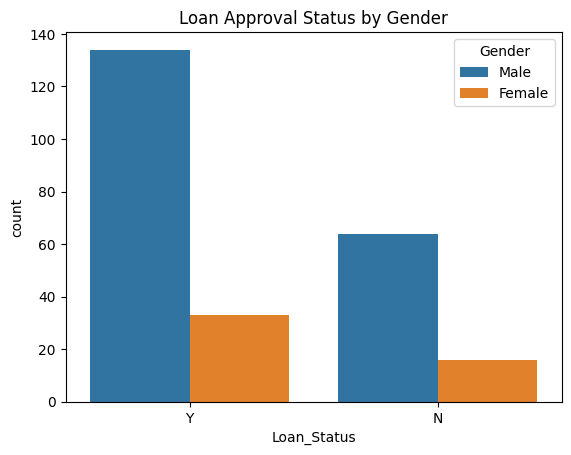

In [18]:
# 2. Gender breakdown within approval status (Table and Plot)
gender_approval_counts = loan_data.groupby(['Loan_Status', 'Gender']).size().unstack()
print("\nGender Breakdown within Approval Status:")
print(gender_approval_counts)

# Plot the gender breakdown within approval status
sns.countplot(x='Loan_Status', hue='Gender', data=loan_data)
plt.title('Loan Approval Status by Gender')
plt.show()



Loan Amount Distribution Statistics:
count    247.000000
mean     152.627530
std       89.516037
min        9.000000
25%      100.000000
50%      130.000000
75%      176.500000
max      600.000000
Name: LoanAmount, dtype: float64


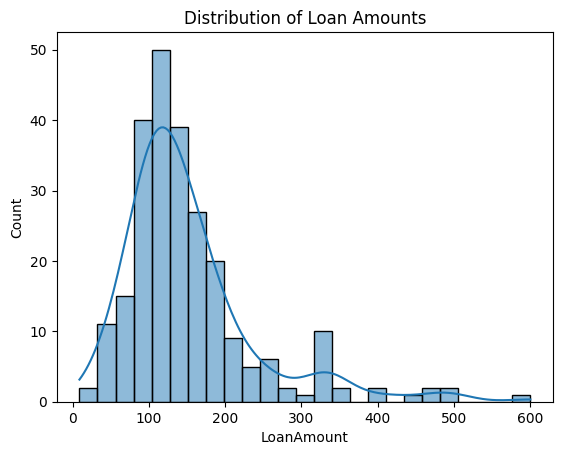

In [19]:
# 3. Distribution of loan amounts (Table and Plot)
loan_amount_stats = loan_data['LoanAmount'].describe()
print("\nLoan Amount Distribution Statistics:")
print(loan_amount_stats)

# Plot the distribution of loan amounts
sns.histplot(loan_data['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

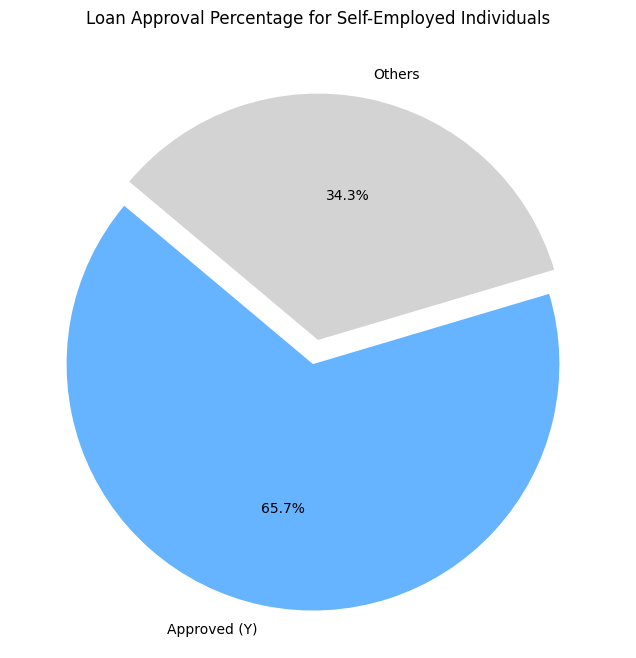

In [38]:


# Filter the data where the person is self-employed and the loan status is 'Y'
df_self_employed_Y = df[(df['Self_Employed'] == 1) & (df['Loan_Status'] == 'Y')]

# Calculate the percentage of 'Y' loan status
total_self_employed = df[df['Self_Employed'] == 1].shape[0]
Y_percentage = (df_self_employed_Y.shape[0] / total_self_employed) * 100

# Plotting the pie chart with only 'Y'
labels = ['Approved (Y)', 'Others']
sizes = [Y_percentage, 100 - Y_percentage]
colors = ['#66b3ff', '#d3d3d3']
explode = (0.1, 0)  # only "explode" the 1st slice (Y)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Loan Approval Percentage for Self-Employed Individuals')
plt.show()


Average Applicant Income: 5403.688259109312
Standard Deviation of Applicant Income: 6485.890425670532


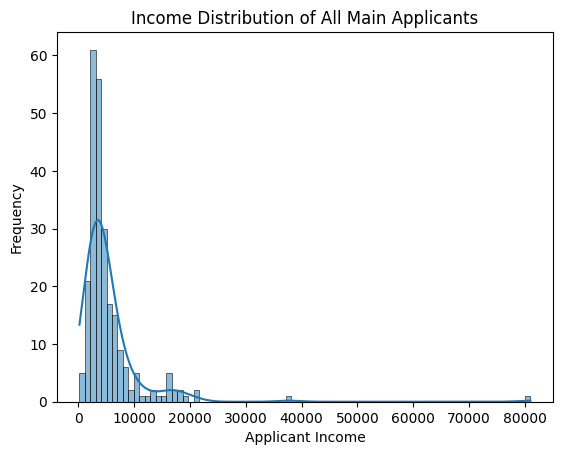

In [21]:
# Calculate the average and standard deviation of income for all main applicants
income_mean = loan_data['ApplicantIncome'].mean()
income_std = loan_data['ApplicantIncome'].std()

print(f"Average Applicant Income: {income_mean}")
print(f"Standard Deviation of Applicant Income: {income_std}")

# Plot the income distribution
sns.histplot(loan_data['ApplicantIncome'], kde=True)
plt.title('Income Distribution of All Main Applicants')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()


Top Ten Applicants by Loan Amount:
         ApplicantIncome  LoanAmount Loan_Status
Loan_ID                                         
2813               19484         600           Y
2547               18333         500           N
2959               12000         496           Y
2624               20833         480           Y
2693                7948         480           Y
1907               14583         436           Y
2386               12876         405           Y
2699               17500         400           Y
2317               81000         360           N
2949                 416         350           N


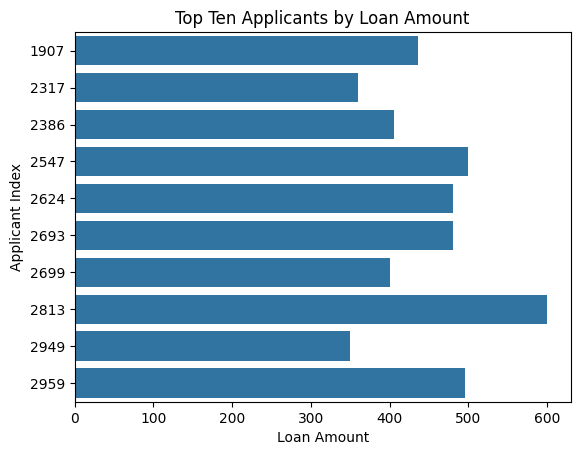

In [22]:
# Identify the top ten applicants by loan amount
top_ten_loans = loan_data.nlargest(10, 'LoanAmount')

print("Top Ten Applicants by Loan Amount:")
print(top_ten_loans[['ApplicantIncome', 'LoanAmount', 'Loan_Status']])

# Display the top ten applicants in a bar plot
sns.barplot(x='LoanAmount', y=top_ten_loans.index, data=top_ten_loans, orient='h')
plt.title('Top Ten Applicants by Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Index')
plt.show()


Distribution of Properties by Area:
Property_Area
Semiurban    95
Rural        84
Urban        68
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

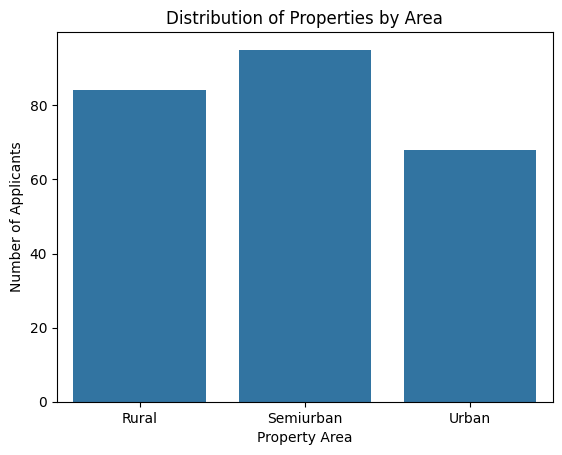

In [33]:
# Count the distribution of properties by area
property_area_distribution = loan_data['Property_Area'].value_counts()

print("Distribution of Properties by Area:")
print(property_area_distribution)

# Plot the distribution of properties by area
sns.countplot(x='Property_Area', data=loan_data)
plt.title('Distribution of Properties by Area')
plt.xlabel('Property Area')
plt.ylabel('Number of Applicants')
plt.show

